In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AMCET Dataset.csv")
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

1. **Personal Information**: Gender, DOB
2. **Academic Information**: 10percentage, 12percentage, collegeGPA, Degree, Specialization, CollegeTier
3. **Skills**: English, Logical, Quant, Domain, ComputerProgramming, ElectronicsAndSemicon, ComputerScience
4. **Job Information**: Salary, DOJ, DOL, Designation, JobCity
5. **Others**: conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience

In [4]:
df.isnull().sum() 

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [5]:
df.duplicated().sum()

0

In [6]:
# Replacing in DOL column (Present Date)
df["DOL"] = df["DOL"].replace("present","3/10/24 0:00")

In [7]:
df["DOJ"] = df["DOJ"].str.split(" ").str[0]
df["DOL"] = df["DOL"].str.split(" ").str[0]
df["DOB"] = df["DOB"].str.split(" ").str[0]

In [8]:
df["DOJ"] = pd.to_datetime(df["DOJ"], format = "%d/%m/%y")

In [9]:
df["DOL"] = pd.to_datetime(df["DOL"], format = "%d/%m/%y")

In [10]:
df["DOB"] = pd.to_datetime(df["DOB"], format = "%m/%d/%y")

In [11]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,2012-01-06,2024-10-03,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,2013-01-09,2024-10-03,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,2014-01-06,2024-10-03,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,2011-01-07,2024-10-03,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,2014-01-03,2015-01-03,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [12]:
df = df.drop(["Unnamed: 0", "ID", "CollegeID", "CollegeCityID"], axis = 1)

In [13]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,2012-01-06,2024-10-03,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,2013-01-09,2024-10-03,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,2014-01-06,2024-10-03,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,2011-01-07,2024-10-03,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,2014-01-03,2015-01-03,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [14]:
df["Experience"] = (df["DOL"] - df["DOJ"]).dt.days / 365.25

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   float64       
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   datetime64[ns]
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   object        
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeTier            3998 non-null   int64         
 13  Deg

In [16]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Experience               0
dtype: int6

In [17]:
df.duplicated().sum()

0

In [18]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience
0,420000.0,2012-01-06,2024-10-03,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,12.741958
1,500000.0,2013-01-09,2024-10-03,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,11.731691
2,325000.0,2014-01-06,2024-10-03,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,10.740589
3,1100000.0,2011-01-07,2024-10-03,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,13.738535
4,200000.0,2014-01-03,2015-01-03,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0.999316


In [ ]:
# --- Univariate Analysis ---

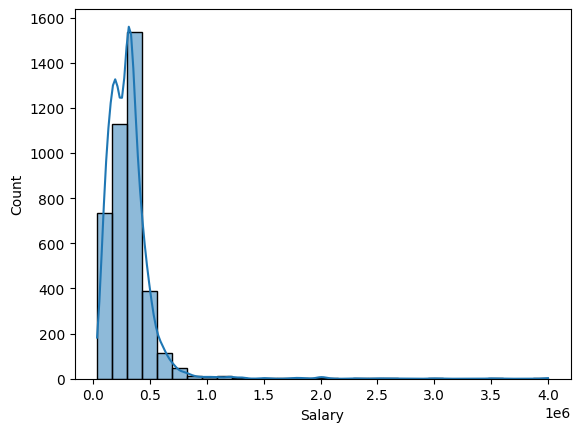

In [19]:
# Distribution of salaries
sns.histplot(df["Salary"], kde=True, bins=30)
plt.show()

In [ ]:
# The salary distribution appears to be right-skewed (positively skewed).
# This means that there are a larger number of employees with lower salaries and a smaller number with very high salaries.
# The right-skewness suggests the possibility of outliers, which are employees with exceptionally high salaries, causing the tail of the distribution to extend further to the right.
# The salary data is not normally distributed.
# It's likely that the company has a structure where a large number of employees receive similar, relatively lower salaries, with a smaller number receiving much higher salaries, possibly in leadership or specialized roles

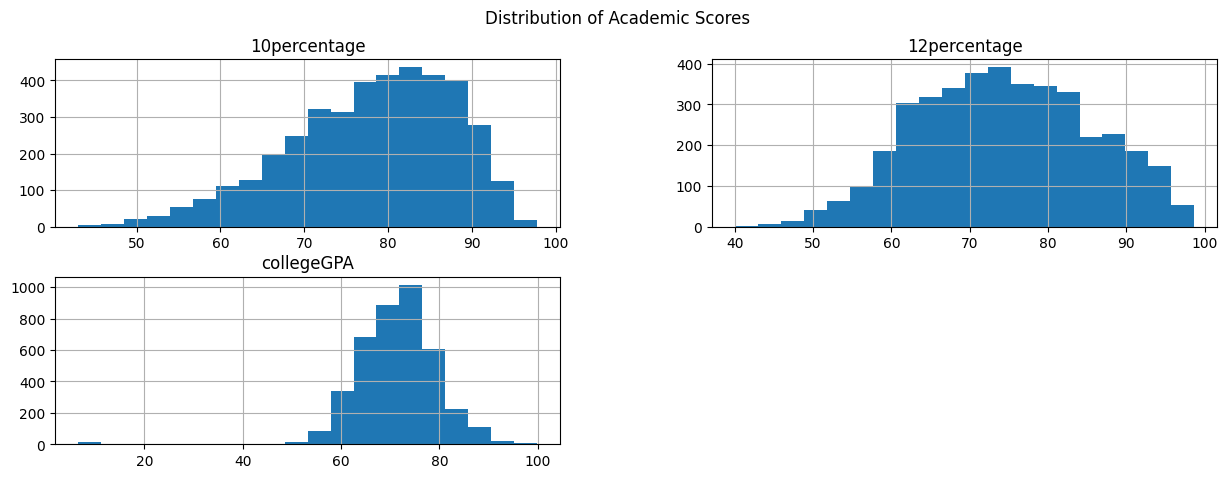

In [20]:
# Distribution of academic scores
df[["10percentage", "12percentage", "collegeGPA"]].hist(bins=20, figsize=(15, 5))
plt.suptitle("Distribution of Academic Scores")
plt.show()

In [ ]:
# 1. 10percentage:
# The distribution of 10th percentage scores appears to be roughly normal, with a peak around the middle range and a relatively symmetric spread.

# 2. 12percentage:
# The distribution of 12th percentage scores also appears to be relatively normal, with a peak around the middle range and a fairly symmetrical spread.
# Similar to the 10th scores, this indicates that most employees have similar performance levels in their 10th and 12th standard education.

# 3. collegeGPA:
# The distribution of college GPAs shows a slight right-skewness.
# There might be a few individuals with significantly higher GPAs compared to the majority.


# The data indicates that the majority of employees have consistent academic performance throughout their education, from 10th to 12th and college.
# The slight right-skewness in college GPA suggests that some individuals have excelled academically during their college years, possibly indicating higher academic potential or dedication.

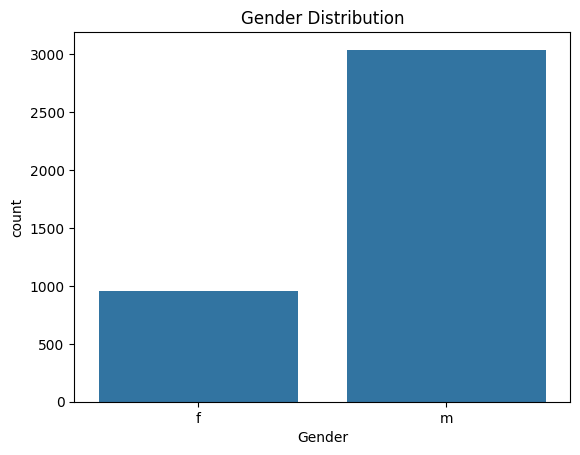

In [21]:
# Gender distribution
sns.countplot(x = "Gender", data = df)
plt.title("Gender Distribution")
plt.show()

In [ ]:
# 1. Representation:
# The plot shows the representation of each gender in the dataset.
# It helps us understand the proportion of male and female employees within the company.

# 2. Gender Imbalance (Possible):
# If one gender category significantly outnumbers the other, it indicates a potential gender imbalance in the dataset.
# This could be due to various factors, such as historical hiring practices or industry-specific trends.

In [ ]:
# --- Bivariate Analysis ---

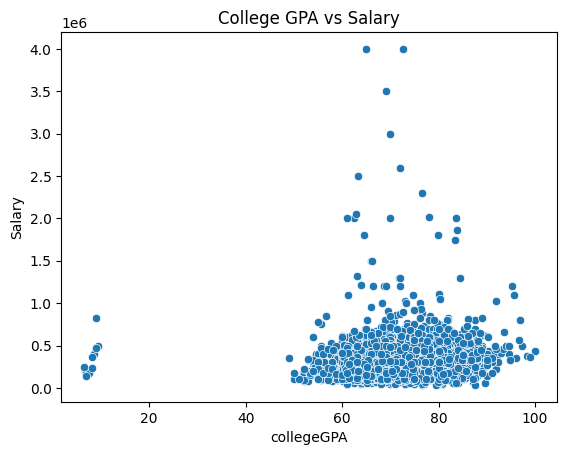

In [22]:
# GPA affect
sns.scatterplot(x = "collegeGPA", y = "Salary", data = df)
plt.title("College GPA vs Salary")
plt.show()

In [ ]:
# The plot suggests a positive correlation between college GPA and salary.
# This means that as college GPA increases, the salary tends to increase as well.
# Clusters or Groups:
# - Are there any distinct clusters or groups of points in the plot?
# - This could indicate different salary levels for employees with similar GPAs, potentially due to other factors such as experience, domain expertise, or designation.
# Interpretation:
# - If there's a positive correlation, it suggests that higher academic achievement (as measured by college GPA) is associated with higher salary levels.
# - This could be due to several reasons:
#  - Better academic performance may indicate higher competence and skills.
#  - Individuals with higher GPAs may be more likely to secure better job opportunities.
#  - Higher GPAs could be associated with better career progression and faster salary increases.

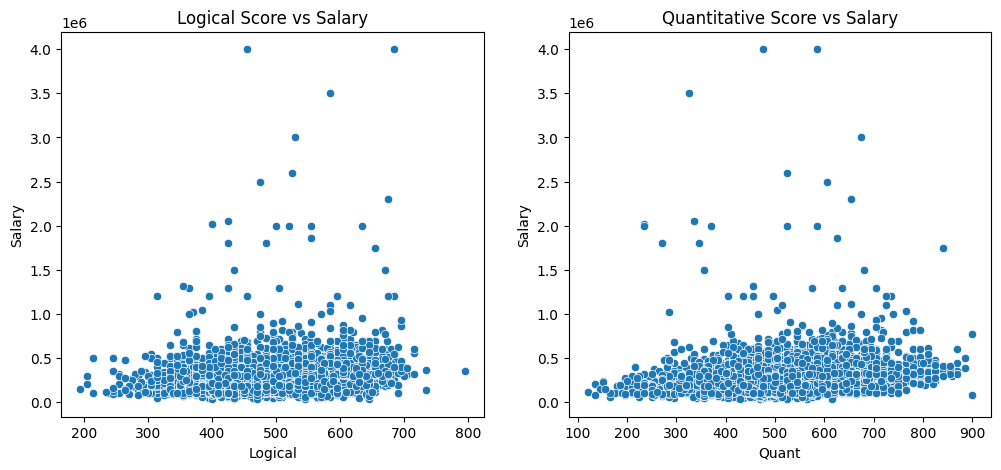

In [23]:
# Logical and Quantitative scores affect salary
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x = "Logical", y = "Salary", data = df, ax = axes[0])
axes[0].set_title("Logical Score vs Salary")
sns.scatterplot(x = "Quant", y = "Salary", data = df, ax = axes[1])
axes[1].set_title("Quantitative Score vs Salary")
plt.show()

In [ ]:
# If scores increase along with salary, it indicates a positive relationship.
# Closer points suggest a stronger correlation, while scattered points show a weaker one.
# Look for points far from the trend; they might represent exceptions.
# Groups of points could indicate other factors like experience or job role influencing salaries.
# Higher logical and quantitative skills might lead to better-paying jobs if a positive trend is observed.

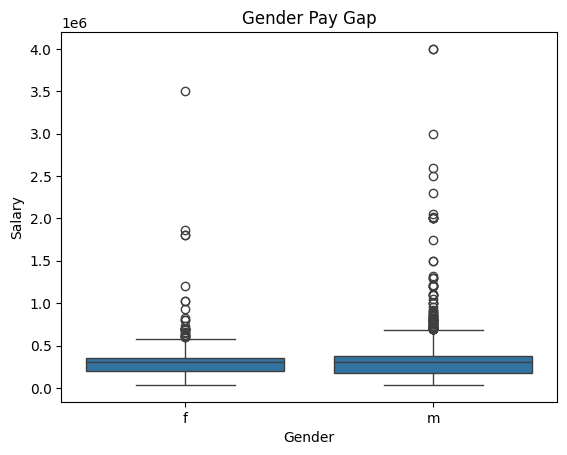

In [24]:
# gender pay gap?
sns.boxplot(x = "Gender", y = "Salary", data = df)
plt.title("Gender Pay Gap")
plt.show()

In [ ]:
# Compare the median lines to see which gender has a higher salary.
# If the middle 50% (IQR) overlaps a lot, salaries are similar.
# If the IQRs don’t overlap, salary differences are more noticeable.
# Individual dots show unusually high or low salaries.
# If one gender’s median salary is much higher and IQRs don’t overlap, it may indicate a pay gap.

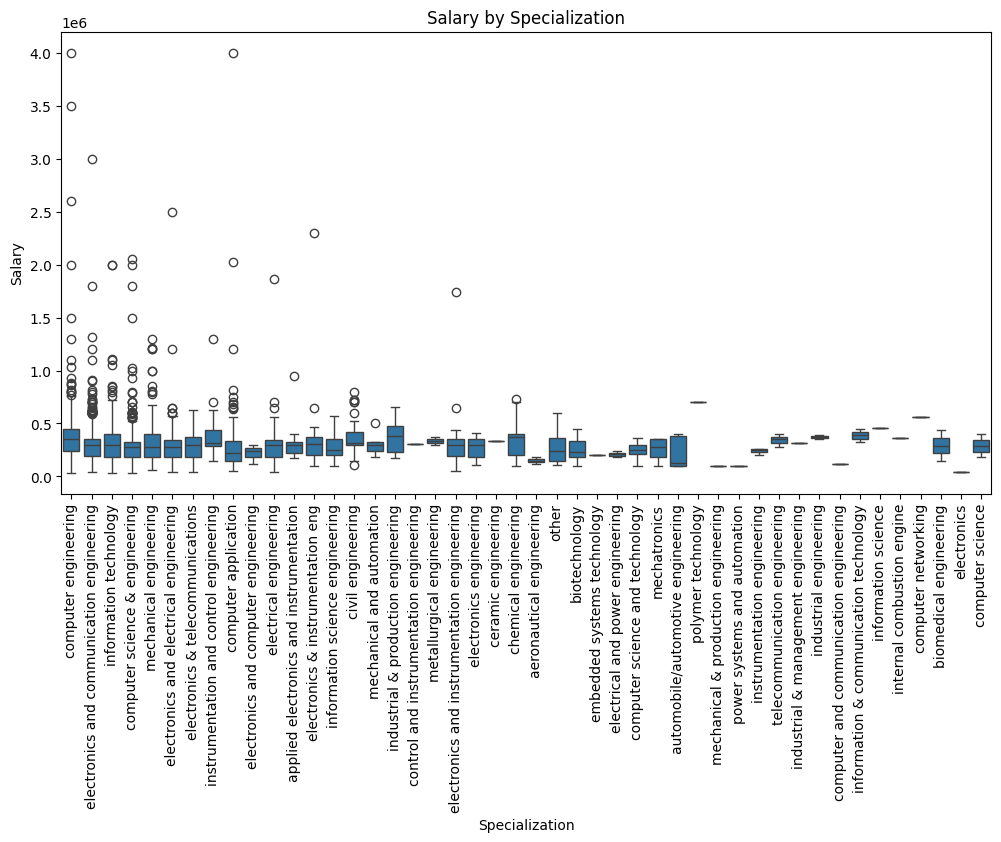

In [25]:
# Specialization influence salary?
plt.figure(figsize=(12, 6))
sns.boxplot(x = "Specialization", y = "Salary", data = df)
plt.title("Salary by Specialization")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Compare the median lines across specializations to see which has higher salaries, indicating more in-demand or better-paying roles.
# A wider IQR suggests a larger salary spread within a specialization, while a narrower IQR indicates more consistent salaries.
# Look for individual points beyond the whiskers; these represent exceptionally high or low salaries. Analyzing outliers can reveal unique factors affecting salaries.
# By examining median salaries, IQRs, and outliers, you can identify lucrative specializations and those with greater salary variability.

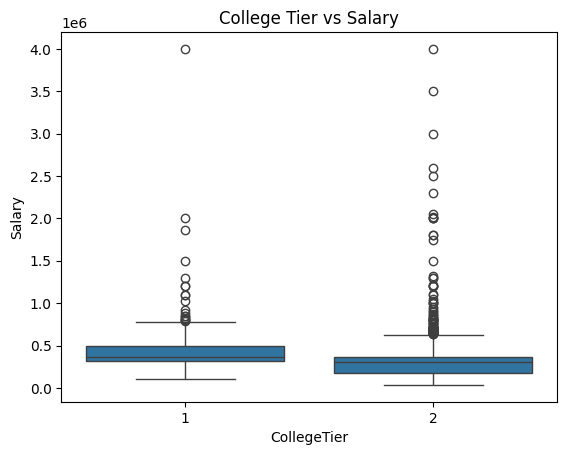

In [28]:
# college tier impact salary?
sns.boxplot(x = "CollegeTier", y = "Salary", data = df)
plt.title("College Tier vs Salary")
plt.show()

In [ ]:
# Compare the median lines for each college tier to identify which tiers have higher salaries, indicating a possible link between college prestige and earning potential.
# A wider IQR suggests a larger salary spread within a tier, while a narrower IQR indicates more consistent salaries.
# Look for individual points beyond the whiskers; these represent unusually high or low salaries. Analyzing outliers can highlight unique factors affecting salaries in each tier.
# By examining median salaries, IQRs, and outliers, you can determine if college tier influences salary levels, indicating the potential impact of educational background on earnings.

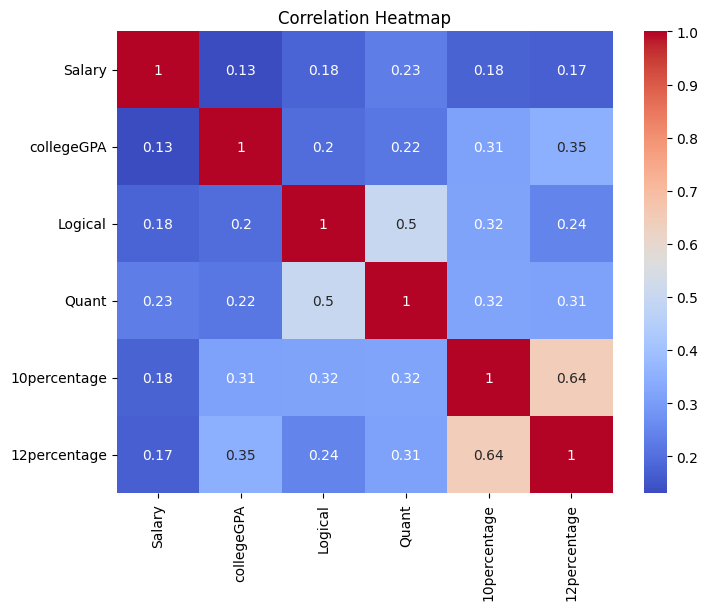

In [29]:
# Correlations between skills and salary?
numeric_df = df.select_dtypes(include=np.number)
if 'Salary' not in numeric_df.columns:
    numeric_df["Salary"] = df["Salary"]

important_columns = ["Salary", "collegeGPA", "Logical", "Quant", "10percentage", "12percentage"]
corr_matrix = numeric_df[important_columns].corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Values close to +1 indicate that as one variable increases, the other also tends to increase (e.g., Salary and collegeGPA).
# Values close to -1 suggest that as one variable increases, the other tends to decrease.
# Values near 0 imply little to no linear relationship between the variables.
# Analyze the correlations between Salary and other variables (like collegeGPA, Logical, Quant).
# A positive correlation implies that higher skill levels often lead to higher salaries (e.g., higher GPAs = higher salaries).
# Look at correlations among skills (e.g., Logical and Quant). A strong correlation suggests individuals excel in both areas, indicating interconnected skills.

<ipython-input-94-82e027cba56f>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='JobCity', y='Salary', data=df_top_cities, ci=None)  # ci=None removes confidence intervals


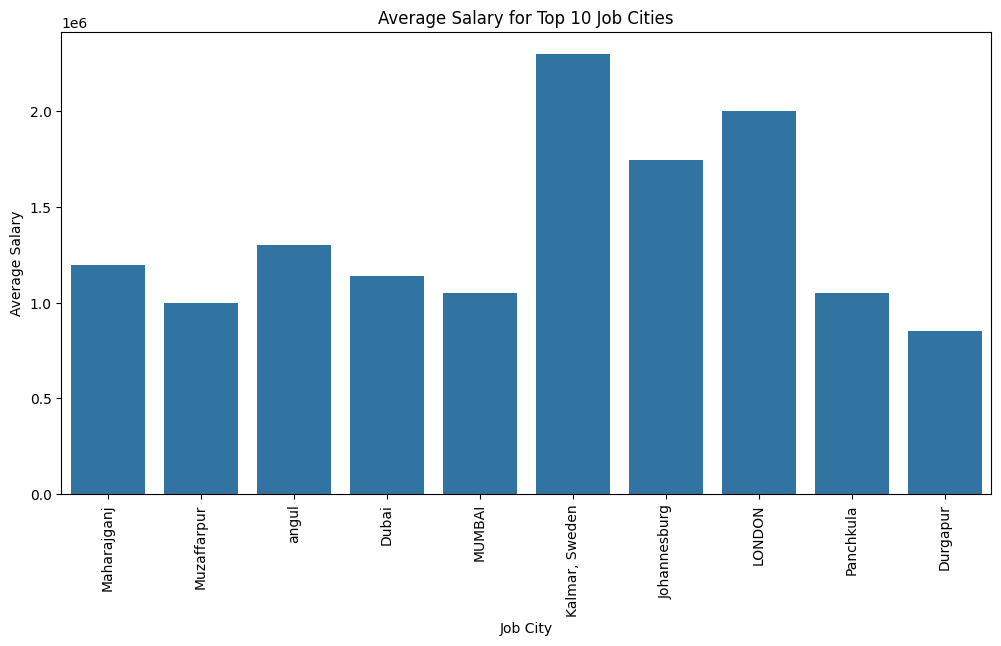

In [94]:
# Job cities influence salary?

city_salary = df.groupby('JobCity')['Salary'].mean().sort_values(ascending=False)

top_10_cities = city_salary.head(10).index.tolist()

df_top_cities = df[df['JobCity'].isin(top_10_cities)]

plt.figure(figsize=(12, 6))
sns.barplot(x='JobCity', y='Salary', data=df_top_cities, ci=None)  # ci=None removes confidence intervals
plt.title("Average Salary for Top 10 Job Cities")
plt.xlabel("Job City")
plt.ylabel("Average Salary")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# The bar plot displays average salaries for the top 10 job cities.
# This allows for a straightforward comparison of salary levels across different cities, highlighting where higher compensation is offered.
# Cities with the tallest bars represent those with the highest average salaries.
# Higher average salaries may indicate greater demand for skilled professionals, more lucrative job opportunities, or higher living costs necessitating better compensation.
# Variations in average salary across cities could be attributed to several factors:

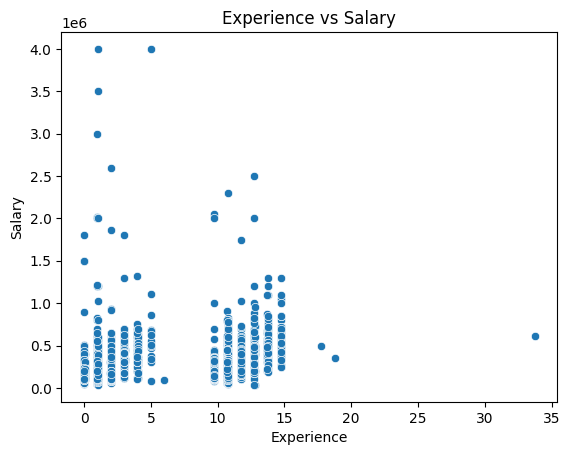

In [30]:
# Do candidates with more experience earn higher salaries?
sns.scatterplot(x = "Experience", y = "Salary", data = df)
plt.title("Experience vs Salary")
plt.show()

In [ ]:
# Each point on the scatter plot represents an individual's experience (on the x-axis) and their corresponding salary (on the y-axis).
# If points trend upward from the bottom left to the top right, it indicates that higher experience is generally associated with higher salaries.
# Look for points that fall far from the general trend. These outliers may indicate exceptional salaries for certain experience levels or lower salaries that may need further investigation.
# The clustering of points around an upward slope can suggest the strength of the correlation between experience and salary.